In [1]:
# Imports
from osprey.config import Config

# Load Configuation File
my_config = './gp-m52-ei-tica-indv/config-all_tor.yaml'
config = Config(my_config)

# Retrieve Trial Results
df = config.trial_results()

/home/robarbon/anaconda3/envs/science/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/robarbon/anaconda3/envs/science/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Loading config file:     ./gp-m52-ei-tica-indv/config-all_tor.yaml...
Loading trials database: sqlite:///osprey-trails.db...


In [2]:
df.head()


,completed,config_sha1,elapsed,host,id,mean_test_score,mean_train_score,n_test_samples,n_train_samples,parameters,project_name,started,status,test_scores,traceback,train_scores,user
0,2017-06-23 12:18:15.134668,f00ec6c70f38246aceededbb5915632206c5992a,1970-01-01 00:00:54.964635,Blaze,1,1.885970,2.975895,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'cluster__tol': 0.0, 'tica__shrinkage': None,...",all_tor,2017-06-23 12:17:20.170033,SUCCEEDED,"[1.1441000150371459, 1.8254356447225453, 1.871...",None,"[2.9926938260115943, 2.999540198188787, 2.9948...",robarbon
1,2017-06-23 12:17:30.705791,54a6a14c45793f757e17c2dc7aabb03f8d523801,1970-01-01 00:00:10.434721,Blaze,2,1.023640,1.556489,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'tica__shrinkage': None, 'msm__verbose': Fals...",chi_tor,2017-06-23 12:17:20.271070,SUCCEEDED,"[1.0699732407996885, 1.0052350528418097, 1.048...",None,"[1.5577424784524452, 1.5311982684970984, 1.662...",robarbon
2,2017-06-23 12:17:24.431259,61bca343a9a7f1ecad92ffd0aff96cd3092f1089,1970-01-01 00:00:04.159350,Blaze,3,1.483084,2.992327,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'tica__shrinkage': None, 'msm__verbose': Fals...",alpha_angle,2017-06-23 12:17:20.271909,SUCCEEDED,"[1.1924436759585062, 1.5130697217749753, 1.629...",None,"[2.992340869955684, 2.994827134720939, 2.99154...",robarbon
3,2017-06-23 12:18:38.310334,5e1c7f4f0c8a5a7dff94ce8de5b49e9cf080aa69,1970-01-01 00:01:18.038382,Blaze,4,1.614493,2.985070,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'close-h_cont__contacts': 'all', 'close-h_con...",close-h_cont,2017-06-23 12:17:20.271952,SUCCEEDED,"[1.094889700416186, 1.7980492860645296, 1.4237...",None,"[2.9872249456360844, 2.976574000043904, 2.9996...",robarbon
4,2017-06-23 12:19:59.540870,3e135d8aedd11ba85476cf9c8af5a22d383f4453,1970-01-01 00:02:39.234654,Blaze,5,1.539387,2.480087,"[14000, 14000, 14000, 14000, 14000]","[14000, 14000, 14000, 14000, 14000]","{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,2017-06-23 12:17:20.306216,SUCCEEDED,"[1.7109594370094698, 1.0538667603410456, 1.098...",None,"[2.3643740981634433, 2.361758922295275, 2.9192...",robarbon


In [3]:
df2 = df.loc[:, ['parameters', 'project_name', 'mean_test_score']]

In [4]:
# df2['which_feat'] = df2['parameters'].apply(lambda x: x['features__which_feat'][0])

In [5]:
df2.head()
df2.tail()

,parameters,project_name,mean_test_score
2842,"{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,1.543934
2843,"{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,1.672324
2844,"{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,1.253869
2845,"{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,1.606170
2846,"{'cluster__max_iter': 100, 'tica__shrinkage': ...",close_cont,1.585594


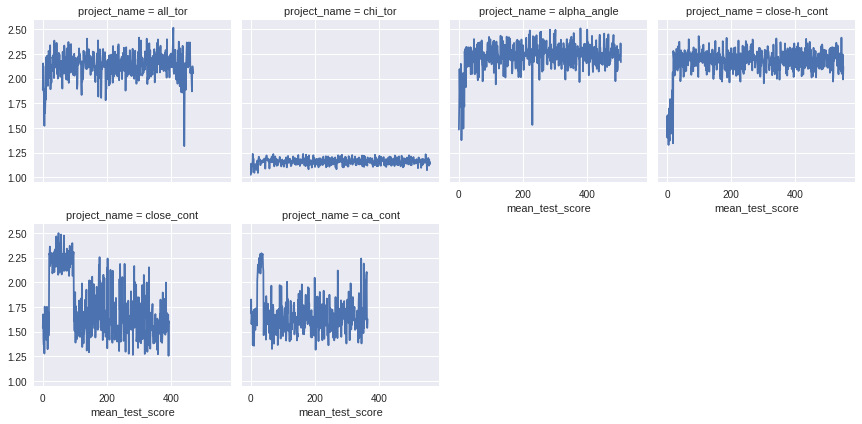

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(df2, col='project_name', col_wrap=4)
g.map(plt.plot, 'mean_test_score')